# MISSION TO MARS

In [1]:
!pip install splinter

In [2]:
!pip install ipynb-py-convert

In [3]:
# Dependencies
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import os
import pandas as pd
import time

In [13]:
# Set Executable Path & Initialize Chrome Browser
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

## STEP 1 - SCRAPPING

## NASA Mars news

*Scrape the [NASA Mars News Site](https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest) and collect the latest News Title and Paragraph Text. Assign the text to variables that you can reference later.*

*Examples*<br>
*news_title = "NASA's Next Mars Mission to Investigate Interior of Red Planet"*<br>
*news_p = "Preparation of NASA's next spacecraft to Mars, InSight, has ramped up this summer, on course for launch next May from Vandenberg Air Force Base in central California -- the first interplanetary launch in history from America's West Coast."*

In [14]:
news_url = 'https://mars.nasa.gov/news/'
browser.visit(news_url)

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:928px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_5y650" type="text/javascript"></script><script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;jsonp=_ate.cbs.rcb_3dxy0" type="text/javascript"></script><script src="//graph.facebook.com/?id=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;fields=og_object%7Bengagement%7D&amp;callback=_ate.cbs.rcb_26b70" type="text/javascript"></script><script src="//api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_157j0" type="text/javascript"></script><script src="//ww
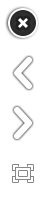
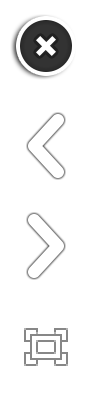
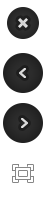
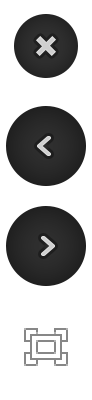
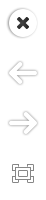
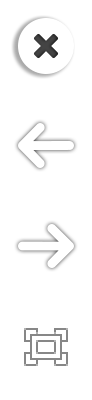
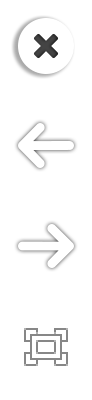
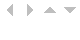

In [6]:
# Create a Beautiful Soup object
news_html = browser.html
news_soup = bs(news_html,'lxml')
print(news_soup)

In [7]:
### Parse Results HTML with BeautifulSoup
### Find Everything Inside:
###   <ul class="item_list">
###     <li class="slide">

news_html = browser.html
news_soup = bs(news_html, "html.parser")
slide_element = news_soup.select_one("ul.item_list li.slide")

In [8]:
#### Print the content title of the news

news_title = slide_element.find("div", class_="content_title").get_text()
news_title

"NASA InSight's 'Mole' Is Out of Sight"

In [9]:
### Scrape the Latest Paragraph Text -bring just text-

news_paragraph = slide_element.find("div", class_="article_teaser_body").get_text()
print(news_paragraph)

Now that the heat probe is just below the Martian surface, InSight's arm will scoop some additional soil on top to help it keep digging so it can take Mars' temperature.


## JPL Mars Space Images - Featured Image

*Visit the url for JPL Featured Space Image [here](https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars)*<br>
*Use splinter to navigate the site and find the image url for the current Featured Mars Image and assign the url string to a variable called featured_image_url.*<br>
*Make sure to find the image url to the full size .jpg image.*<br>
*Make sure to save a complete url string for this image.*<br>
*Example:
featured_image_url = 'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16225_hires.jpg'*


In [16]:
# Set Executable Path & Initialize Chrome Browser
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [17]:
### Visit the NASA JPL (Jet Propulsion Laboratory) Site

# Example:
#featured_image_url = 'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16225_hires.jpg'

url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars" 
browser.visit(url)

In [18]:
### Ask Splinter to Go to Site and Click Button with Class Name full_image
### <button class="full_image">Full Image</button>

full_image_button = browser.find_by_id("full_image")
full_image_button.click()

In [19]:
### Find "More Info" Button and Click It 

browser.is_element_present_by_text("more info", wait_time=1)
more_info_element = browser.find_link_by_partial_text("more info")
more_info_element.click()

C:\Users\gloam\anaconda3\lib\site-packages\splinter\driver\webdriver\__init__.py:493: FutureWarning: browser.find_link_by_partial_text is deprecated. Use browser.links.find_by_partial_text instead.
  FutureWarning,


In [20]:
### Parse Results HTML with BeautifulSoup

html = browser.html
image_soup = bs(html, "html.parser")

In [21]:
image_url = image_soup.find("figure", class_= "lede").a["href"]

In [22]:
### Use Base URL to Create Absolute URL

img_url = f"https://www.jpl.nasa.gov{image_url}"
print(img_url)

https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA14934_hires.jpg


## Mars Weather

*Visit the Mars Weather twitter account [here](https://twitter.com/marswxreport?lang=en) and scrape the latest Mars weather tweet from the page. Save the tweet text for the weather report as a variable called mars_weather.*<br>
*Note: Be sure you are not signed in to twitter, or scraping may become more difficult.*<br>
*Note: Twitter frequently changes how information is presented on their website. If you are having difficulty getting the correct html tag data, consider researching Regular Expression Patterns and how they can be used in combination with the .find() method.*<br>
*Example:
mars_weather = 'Sol 1801 (Aug 30, 2017), Sunny, high -21C/-5F, low -80C/-112F, pressure at 8.82 hPa, daylight 06:09-17:55'*


In [23]:
import re

In [42]:
# Set Executable Path & Initialize Chrome Browser
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [43]:
### Visit the Mars Weather and get info from Twitter Account
#weather_url = "https://twitter.com/marswxreport?lang=en"
#response = requests.get(weather_url)

### Parse Results HTML with BeautifulSoup
#soup = bs(response.text, "html.parser")
#soup.html()

In [44]:
# Visit the Mars Weather Twitter Account
t_url = "https://twitter.com/marswxreport?lang=en"
browser.visit(t_url)


In [45]:
# Parse Results HTML with BeautifulSoup
html = browser.html
soup = bs(html, "html.parser")

In [46]:
# Find a Tweet with the data-name `Mars Weather`
mars_weather_tweet = soup.find("div", 
                                       attrs={
                                           "class": "tweet", 
                                            "data-name": "Mars Weather"
                                        })

In [47]:
# Search Within Tweet for <p> Tag Containing Tweet Text
try:
    mars_weather = mars_weather_tweet.find("p", "tweet-text").get_text()
    mars_weather

except AttributeError:
    pattern = re.compile(r'sol')
    mars_weather = soup.find('span', text=pattern).text
    mars_weather
    
mars_weather = mars_weather.replace("InSight","").replace("sol", "Sol")

print(mars_weather)

 Sol 671 (2020-10-15) low -96.0ºC (-140.7ºF) high -8.5ºC (16.6ºF)
winds from the WNW at 5.7 m/s (12.7 mph) gusting to 19.1 m/s (42.7 mph)
pressure at 7.50 hPa


## Mars Facts

*Visit the Mars Facts webpage here and use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.*<br>
*Use Pandas to convert the data to a HTML table string.*

In [48]:
url_facts = "https://space-facts.com/mars/" 

In [49]:
tables = pd.read_html(url_facts)[0]
tables

,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [50]:
tables.columns = ["Description", "Mars"]
tables

,Description,Mars
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [51]:
tables.set_index("Description", inplace = True)
tables

,Mars
Description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [52]:
facts_html = tables.to_html()
facts_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Mars</th>\n    </tr>\n    <tr>\n      <th>Description</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter:</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter:</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance:</th>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period:</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature:</th>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>First Record:</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By:</th>\n      <td>Egyptian astronomers</td>\n    </tr>\n

## Mars Hemispheres

*Visit the USGS Astrogeology site here to obtain high resolution images for each of Mar's hemispheres.*<br>
*You will need to click each of the links to the hemispheres in order to find the image url to the full resolution image*<br>
*Save both the image url string for the full resolution hemisphere image, and the Hemisphere title containing the hemisphere name. Use a Python dictionary to store the data using the keys img_url and title.*<br>
*Append the dictionary with the image url string and the hemisphere title to a list. This list will contain one dictionary for each hemisphere.*<br>

*Example:
*hemisphere_image_urls = [*<br>
    *{"title": "Valles Marineris Hemisphere", "img_url": "..."},*<br>
    *{"title": "Cerberus Hemisphere", "img_url": "..."}*<br>
    *{"title": "Schiaparelli Hemisphere", "img_url": "..."},*<br>
    *{"title": "Syrtis Major Hemisphere", "img_url": "..."},*<br>
]*

In [53]:
# Set Executable Path & Initialize Chrome Browser
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [54]:
url_hem = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(url_hem)

In [55]:
hemisphere_image_urls = []
links = browser.find_by_css("a.product-item h3")
for i in range(len(links)):
    hemisphere = {}
    browser.find_by_css("a.product-item h3")[i].click()
    sample_elem = browser.links.find_by_text('Sample').first
    hemisphere['img_url'] = sample_elem['href']
    hemisphere['title'] = browser.find_by_css("h2.title").text
    hemisphere_image_urls.append(hemisphere)
    browser.back()

In [56]:
hemisphere_image_urls

[{'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg',
  'title': 'Cerberus Hemisphere Enhanced'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg',
  'title': 'Schiaparelli Hemisphere Enhanced'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg',
  'title': 'Syrtis Major Hemisphere Enhanced'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg',
  'title': 'Valles Marineris Hemisphere Enhanced'}]

## SUMMARY

In [57]:
#Create complete Mars Dictionary
Mars_Dict = {
    "news_title":news_title,
    "news_p":news_paragraph,
    "featured_image_url":image_url,
    "mars_weather":mars_weather,
    "facts":tables,
    "hemisphre_image_urls":hemisphere_image_urls
}

In [58]:
Mars_Dict

{'news_title': "NASA InSight's 'Mole' Is Out of Sight",
 'news_p': "Now that the heat probe is just below the Martian surface, InSight's arm will scoop some additional soil on top to help it keep digging so it can take Mars' temperature.",
 'featured_image_url': '/spaceimages/images/largesize/PIA14934_hires.jpg',
 'mars_weather': ' Sol 671 (2020-10-15) low -96.0ºC (-140.7ºF) high -8.5ºC (16.6ºF)\nwinds from the WNW at 5.7 m/s (12.7 mph) gusting to 19.1 m/s (42.7 mph)\npressure at 7.50 hPa',
 'facts':                                                Mars
 Description                                        
 Equatorial Diameter:                       6,792 km
 Polar Diameter:                            6,752 km
 Mass:                 6.39 × 10^23 kg (0.11 Earths)
 Moons:                          2 (Phobos & Deimos)
 Orbit Distance:            227,943,824 km (1.38 AU)
 Orbit Period:                  687 days (1.9 years)
 Surface Temperature:                   -87 to -5 °C
 First Record:    